# Simple CNN model for CIFAR-10


In [1]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

Using TensorFlow backend.


'tf'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


fix random seed for reproducibility

In [0]:
seed = 7
numpy.random.seed(seed)

load data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


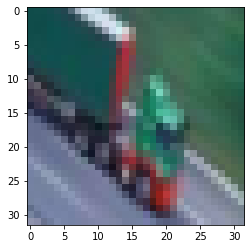

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[50,:,:],cmap='gray')
#plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()
X_train.shape

In [0]:
yu=y_test


normalize inputs from 0-255 to 0.0-1.0

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [32]:
X_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

one hot encode outputs

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
type(y_test)

numpy.ndarray

Create the model

In [0]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

Compile model

In [0]:
epochs = 70
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [26]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

Fit the model

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 53s 1ms/step - loss: 1.8891 - accuracy: 0.3158 - val_loss: 1.3749 - val_accuracy: 0.5033
Epoch 2/5
50000/50000 [==============================] - 45s 905us/step - loss: 1.3676 - accuracy: 0.5095 - val_loss: 1.1896 - val_accuracy: 0.5784
Epoch 3/5
50000/50000 [==============================] - 45s 903us/step - loss: 1.2057 - accuracy: 0.5701 - val_loss: 1.0826 - val_accuracy: 0.6211
Epoch 4/5
50000/50000 [==============================] - 45s 901us/step - loss: 1.0974 - accuracy: 0.6126 - val_loss: 1.0081 - val_accuracy: 0.6473
Epoch 5/5
50000/50000 [==============================] - 45s 903us/step - loss: 1.0244 - accuracy: 0.6355 - val_loss: 0.9503 - val_accuracy: 0.6686


Final evaluation of the model

In [23]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.02%


In [57]:
y=model.predict_classes(X_train[[1],:])

c=model.predict_proba(X_train[[1],:],1)
print(c[0])

[1.07895415e-02 3.09150703e-02 4.78956522e-03 7.15145434e-04
 2.16493514e-04 4.19678632e-04 6.39861082e-06 7.60670332e-03
 3.31977382e-02 9.11343575e-01]


In [62]:
model.predict_proba(X_test[[1],:])


array([[5.2959276e-03, 8.4246629e-01, 4.8647448e-06, 3.6685069e-06,
        1.4894716e-06, 1.9243375e-07, 1.9330430e-07, 4.9870170e-07,
        1.4799957e-01, 4.2272490e-03]], dtype=float32)

In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/chest_xray/First_Model.pk2",'wb') as file:
      pickle.dump(model,file)

In [44]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
print(y[0])

9


1. build a model with given instructions


In [11]:
m1 = Sequential()
m1.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m1.add(Dropout(0.2))
m1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(Dropout(0.2))
m1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Flatten())
m1.add(Dropout(0.2))
m1.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m1.add(Dropout(0.2))
m1.add(Dense(num_classes, activation='softmax'))
epochs = 5
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
m1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(m1.summary())
m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

2. FUNCTIONAL API MODEL


In [0]:

from keras.models import Model
from keras.layers import Input
i=Input(shape=X_train.shape[1:])
x=Conv2D(32,(3,3),input_shape=(X_train.shape[1:]),padding="same",activation='relu')(i)
x=Dropout(0.2)(x)
x=Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2))(x)
x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(512, activation='relu',kernel_constraint=maxnorm(3))(x)
x=Dense(10, activation='softmax')(x)
#p2 = Model(input=i,output=x)


In [15]:
p2 = Model(input=i,output=x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
p2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
#p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 22s 435us/step - loss: 1.7073 - accuracy: 0.4427 - val_loss: 1.2426 - val_accuracy: 0.5671
Epoch 2/5
50000/50000 [==============================] - 22s 433us/step - loss: 1.1359 - accuracy: 0.6027 - val_loss: 1.1270 - val_accuracy: 0.6038
Epoch 3/5
50000/50000 [==============================] - 21s 429us/step - loss: 0.9970 - accuracy: 0.6513 - val_loss: 0.9819 - val_accuracy: 0.6562
Epoch 4/5
50000/50000 [==============================] - 21s 428us/step - loss: 0.9130 - accuracy: 0.6809 - val_loss: 1.0178 - val_accuracy: 0.6445
Epoch 5/5
50000/50000 [==============================] - 21s 429us/step - loss: 0.8423 - accuracy: 0.7078 - val_loss: 0.9713 - val_accuracy: 0.6638


3. PREDICT FIRST 5 IMAGES IN TEST DATA


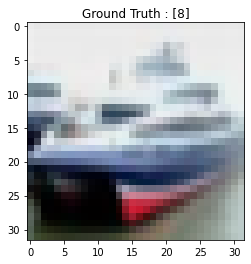

Predicted as 1


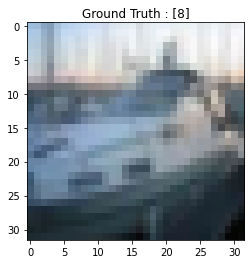

Predicted as 8


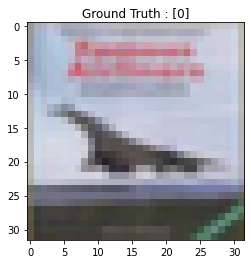

Predicted as 0


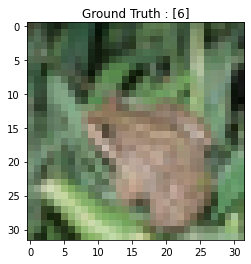

Predicted as 6


In [10]:
import matplotlib.pyplot as plt
for i in range(1,5):
  plt.imshow(X_test[i,:,:])
  plt.title('Ground Truth : {}'.format(yu[i]))
  plt.show()
  y=model.predict_classes(X_test[[i],:])
  print("Predicted as",y[0])
  